# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install seaborn

### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [4]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_data.shape

(4324, 9)

In [6]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [7]:
df_data.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [8]:
df_data

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [9]:
df_data=df_data.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

## Descriptive Statistics

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<AxesSubplot:xlabel='Organisation'>

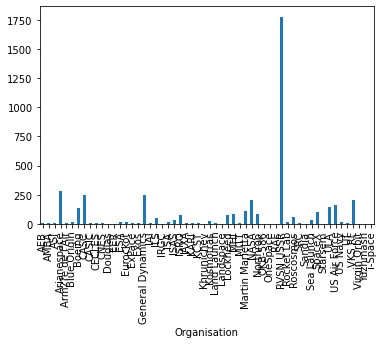

In [11]:
df_data.groupby(['Organisation']).size().plot(kind = "bar")

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

<AxesSubplot:xlabel='Organisation'>

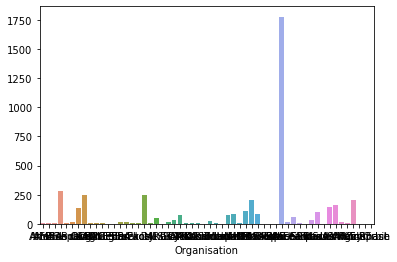

In [12]:
result =df_data.groupby(['Organisation']).size()
 
# plot the result
sns.barplot(x = result.index, y = result.values)

In [13]:
df_data[df_data['Rocket_Status']=="StatusActive"].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1684, 1794, 1932, 1980, 1986, 2041, 2101, 2177, 2249, 2309],
           dtype='int64', length=790)

In [14]:
df_data[df_data['Rocket_Status']=="StatusRetired"].index

Int64Index([  29,   64,   98,  100,  105,  107,  122,  145,  154,  155,
            ...
            4314, 4315, 4316, 4317, 4318, 4319, 4320, 4321, 4322, 4323],
           dtype='int64', length=3534)

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [15]:
df_data[df_data['Mission_Status']=="Success"].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4289, 4291, 4293, 4309, 4313, 4316, 4317, 4320, 4322, 4323],
           dtype='int64', length=3879)

In [16]:
df_data[df_data['Mission_Status']=="Failure"].index

Int64Index([  11,   15,   27,   36,   43,   52,   91,  124,  137,  152,
            ...
            4307, 4308, 4310, 4311, 4312, 4314, 4315, 4318, 4319, 4321],
           dtype='int64', length=339)

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

<AxesSubplot:xlabel='Price'>

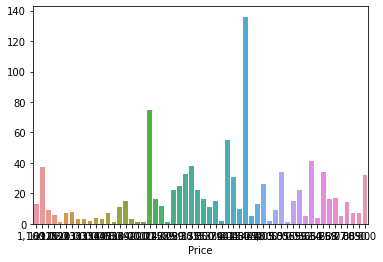

In [17]:
result =df_data.groupby(['Price']).size()
 
# plot the result
sns.barplot(x = result.index, y = result.values)

In [18]:
new=df_data['Location'].str.split(pat=',', n=4, expand = True)

In [19]:
df_data['Location']

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 4324, dtype: object

In [20]:
new

,0,1,2,3
0,LC-39A,Kennedy Space Center,Florida,USA
1,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,None
2,Pad A,Boca Chica,Texas,USA
3,Site 200/39,Baikonur Cosmodrome,Kazakhstan,None
4,SLC-41,Cape Canaveral AFS,Florida,USA
...,...,...,...,...
4319,LC-18A,Cape Canaveral AFS,Florida,USA
4320,LC-26A,Cape Canaveral AFS,Florida,USA
4321,LC-18A,Cape Canaveral AFS,Florida,USA
4322,Site 1/5,Baikonur Cosmodrome,Kazakhstan,None


In [21]:
count=-1
n=[]
for i in new[3]:
    count=count+1
    if str(i)=="None":
        n.append(str(new[2][count]).strip())
    else:
        n.append("USA")

In [22]:
n

['USA',
 'China',
 'USA',
 'Kazakhstan',
 'USA',
 'China',
 'Kazakhstan',
 'China',
 'USA',
 'Japan',
 'USA',
 'China',
 'China',
 'Israel',
 'China',
 'New Zealand',
 'China',
 'USA',
 'China',
 'China',
 'USA',
 'New Zealand',
 'China',
 'USA',
 'China',
 'USA',
 'None',
 'USA',
 'Russia',
 'Japan',
 'USA',
 'China',
 'China',
 'Kazakhstan',
 'USA',
 'None',
 'China',
 'Kazakhstan',
 'USA',
 'China',
 'Kazakhstan',
 'USA',
 'Russia',
 'China',
 'China',
 'USA',
 'Russia',
 'China',
 'USA',
 'USA',
 'USA',
 'USA',
 'Iran',
 'Japan',
 'Kazakhstan',
 'New Zealand',
 'USA',
 'USA',
 'USA',
 'China',
 'China',
 'China',
 'USA',
 'China',
 'Russia',
 'Kazakhstan',
 'USA',
 'China',
 'USA',
 'USA',
 'China',
 'USA',
 'India',
 'Russia',
 'China',
 'None',
 'Kazakhstan',
 'New Zealand',
 'USA',
 'China',
 'India',
 'USA',
 'Russia',
 'China',
 'China',
 'China',
 'China',
 'USA',
 'China',
 'China',
 'USA',
 'New Mexico',
 'China',
 'New Zealand',
 'USA',
 'Kazakhstan',
 'China',
 'Russia',


In [23]:
df_data['Country']=pd.Series(n)

In [24]:
df_data['Country'][df_data['Country']=='Yellow Sea']="China"

In [25]:
df_data['Country'].where(df_data['Country']=='USA')

0       USA
1       NaN
2       USA
3       NaN
4       USA
       ... 
4319    USA
4320    USA
4321    USA
4322    NaN
4323    NaN
Name: Country, Length: 4324, dtype: object

In [26]:
df_data.dropna()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China
...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA


In [27]:
df_data.loc[df_data['Country']==' Russia', "Country"] = "Russian Federation" 

In [28]:
df_data.loc[df_data['Country']==' New Mexico', "Country"] = "USA" 

In [29]:
df_data.loc[df_data['Country']=='Shahrud Missile Test Site', "Country"] = "Iran" 

In [30]:
df_data.loc[df_data['Country']=='Pacific Missile Range Facility', "Country"] = "USA" 

In [31]:
df_data.loc[df_data['Country']=='Barents Sea', "Country"] = "Russian Federation" 

In [33]:
df_data.loc[df_data['Country']=='Gran Canaria', "Country"] = "USA" 

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [53]:
pip install pycountry

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for pycountry, since package 'wheel' is not installed.
    Running setup.py install for pycountry: started
    Running setup.py install for pycountry: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pycountry
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2
countries["USA"]= "USA"  
input_countries = ['American Samoa', 'Canada', 'France']
codes = [countries.get(country) for country in n]
print(codes)  # prints ['AS', 'CA', 'FR']

['USA', 'CN', 'USA', 'KZ', 'USA', 'CN', 'KZ', 'CN', 'USA', 'JP', 'USA', 'CN', 'CN', 'IL', 'CN', 'NZ', 'CN', 'USA', 'CN', 'CN', 'USA', 'NZ', 'CN', 'USA', 'CN', 'USA', None, 'USA', None, 'JP', 'USA', 'CN', 'CN', 'KZ', 'USA', None, 'CN', 'KZ', 'USA', 'CN', 'KZ', 'USA', None, 'CN', 'CN', 'USA', None, 'CN', 'USA', 'USA', 'USA', 'USA', None, 'JP', 'KZ', 'NZ', 'USA', 'USA', 'USA', 'CN', 'CN', 'CN', 'USA', 'CN', None, 'KZ', 'USA', 'CN', 'USA', 'USA', 'CN', 'USA', 'IN', None, 'CN', None, 'KZ', 'NZ', 'USA', 'CN', 'IN', 'USA', None, 'CN', 'CN', 'CN', 'CN', 'USA', 'CN', 'CN', 'USA', None, 'CN', 'NZ', 'USA', 'KZ', 'CN', None, 'KZ', 'CN', 'JP', 'CN', 'CN', 'CN', 'CN', None, None, 'USA', 'KZ', 'NZ', 'CN', 'CN', 'USA', 'USA', 'USA', 'KZ', 'KZ', None, 'CN', 'USA', 'CN', 'IN', 'KZ', 'KZ', 'USA', None, None, None, 'NZ', 'USA', 'CN', 'USA', 'USA', None, 'KZ', None, 'USA', 'CN', 'IN', 'CN', 'NZ', 'USA', 'USA', None, 'CN', 'USA', 'USA', 'USA', 'KZ', 'IN', 'CN', 'NZ', 'CN', 'USA', 'USA', 'KZ', 'CN', None, 'U

In [35]:
df_data["Codes"]=pd.Series(codes)

In [36]:
df_data["Codes"]

0       USA
1        CN
2       USA
3        KZ
4       USA
       ... 
4319    USA
4320    USA
4321    USA
4322     KZ
4323     KZ
Name: Codes, Length: 4324, dtype: object

In [37]:
df_data.dropna()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Codes
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CN
...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success,USA,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,USA


# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
import plotly.express as px

df = px.data.gapminder().query("year==2007")
fig = px.choropleth(df_data, locations="Codes",
                    color="Mission_Status", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [45]:
import plotly.express as px
fig = px.sunburst(
    df_data,
    names='Country',
    parents='Organisation',
    values='Mission_Status',
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [52]:
df_data["Price"]=pd.to_numeric(df_data["Price"])
np.sum(df_data["Price"]) 

AttributeError: 'Series' object has no attribute 'strip'

In [60]:
df_data=df_data.dropna()

In [ ]:
df_data["Price"]=df_data["Price"].str.replace(',', '').astype(float)

In [62]:
df_data["Price"]

0       50.00
1       29.75
3       65.00
4      145.00
5       64.68
        ...  
3855    59.00
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 903, dtype: float64

In [66]:
print("Total Amount Spent in millions:",df_data["Price"].sum())

Total Amount Spent in millions: 145865.30000000002


# Analyse the Amount of Money Spent by Organisation per Launch

In [67]:
org=df_data.groupby(['Organisation'])

In [69]:
org["Price"].sum()

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,234.18
EER                   20.00
ESA                   37.00
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            348.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              76,280.00
Northrop           3,850.00
RVSN USSR         10,000.00
Rocket Lab            97.50
Roscosmos          1,055.50
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF               325.00
Virgin Orbit          12.00
Name: Price, dtype: float64

# Chart the Number of Launches per Year

In [77]:
year_new=df_data["Date"].str.split(pat=' ', n=4, expand = True)

In [78]:
year_new

,0,1,2,3,4
0,Fri,Aug,"07,",2020,05:12 UTC
1,Thu,Aug,"06,",2020,04:01 UTC
3,Thu,Jul,"30,",2020,21:25 UTC
4,Thu,Jul,"30,",2020,11:50 UTC
5,Sat,Jul,"25,",2020,03:13 UTC
...,...,...,...,...,...
3855,Fri,Jul,"29,",1966,18:43 UTC
3971,Thu,May,"06,",1965,15:00 UTC
3993,Thu,Feb,"11,",1965,15:19 UTC
4000,Thu,Dec,"10,",1964,16:52 UTC


In [79]:
year_new[3]

0       2020
1       2020
3       2020
4       2020
5       2020
        ... 
3855    1966
3971    1965
3993    1965
4000    1964
4020    1964
Name: 3, Length: 903, dtype: object

In [82]:
df_data["Year"]=pd.Series(year_new[3])

In [81]:
 pd.options.mode.chained_assignment = None

In [83]:
df_data["Year"]

0       2020
1       2020
3       2020
4       2020
5       2020
        ... 
3855    1966
3971    1965
3993    1965
4000    1964
4020    1964
Name: Year, Length: 903, dtype: object

In [84]:
year=df_data.groupby(['Year'])

In [86]:
year["Year"].count()

Year
1964     2
1965     2
1966     3
1967     8
1968    10
1969     8
1970     1
1971     2
1972     2
1973     1
1981     2
1982     4
1983     5
1984     6
1985    10
1986     3
1987     3
1988     5
1989     6
1990    11
1991     7
1992    12
1993    12
1994    16
1995    10
1996    14
1997    16
1998    18
1999    14
2000    15
2001    10
2002    15
2003    18
2004    16
2005    13
2006    25
2007    28
2008    26
2009    28
2010    26
2011    27
2012    24
2013    27
2014    37
2015    35
2016    59
2017    64
2018    81
2019    66
2020    50
Name: Year, dtype: int64

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [89]:
df_data["Month"]=year_new[1]

In [93]:
Month=df_data.groupby(['Month'])

In [103]:
month_count=Month["Month"].count()

In [109]:
roll_avg =Month["Month"].count().rolling(7).mean()

([<matplotlib.axis.XTick at 0x20445f66d10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

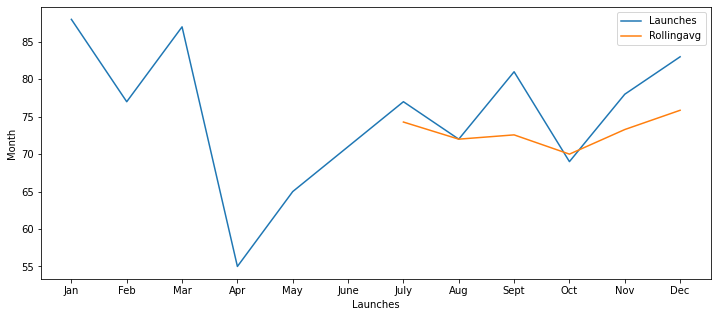

In [110]:
# set figure size
plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
sns.lineplot(x = lab,
             y =month_count  ,
             label = 'Launches')
sns.lineplot( x = lab,
             y = roll_avg,
             label = 'Rollingavg')  
plt.xlabel( 'Launches')
  
# setting customized ticklabels for x axis
  
plt.xticks(lab)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [116]:
#As observed Jan is the best and least is April

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [119]:
Y=np.unique(np.array(year_new[3]))

In [122]:
year_count=year["Year"].count()

In [140]:
org_year=df_data.groupby(["Organisation","Year"])

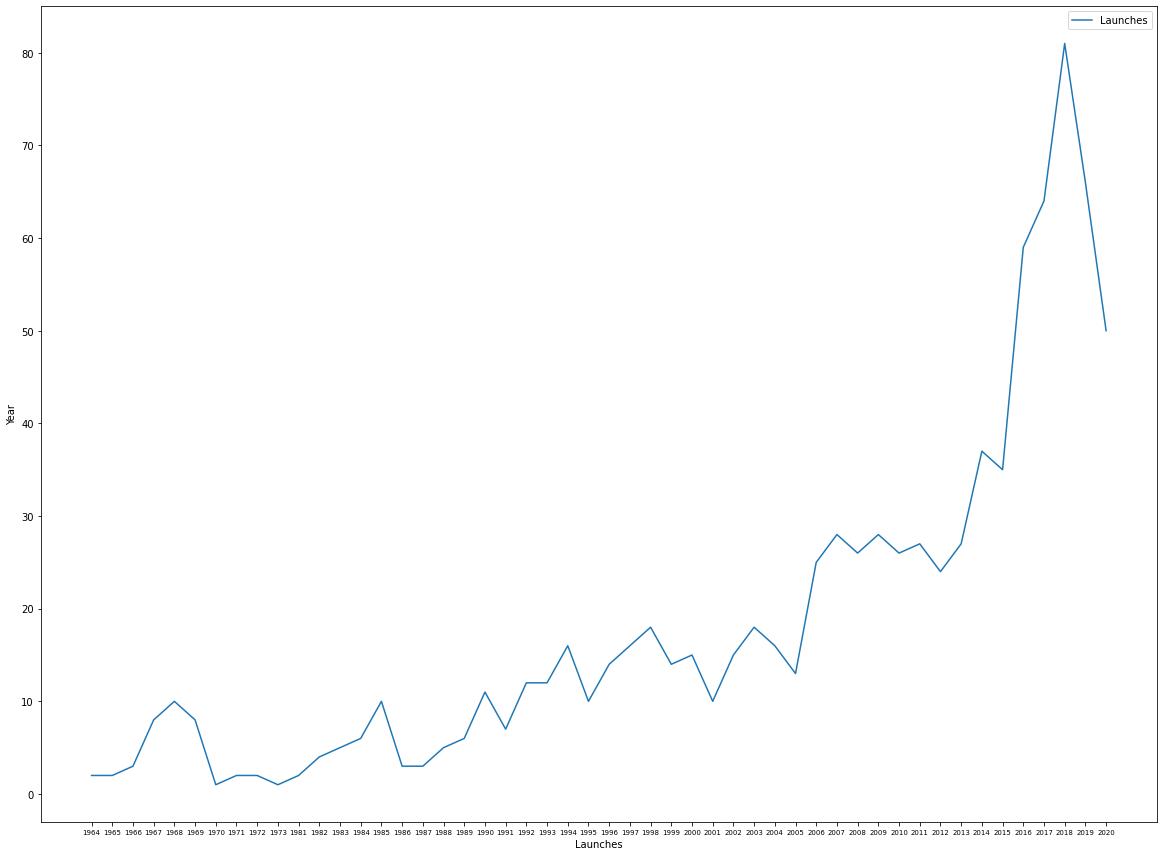

In [130]:
# set figure size
plt.figure( figsize = ( 20, 15))
  
sns.lineplot(x = Y,
             y =year_count  ,
             label = 'Launches')
plt.xlabel( 'Launches')
plt.tick_params(axis='x', which='major', labelsize=7)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [155]:
org_year_count=org_year.count()

In [149]:
org_year.count()

Location  Date  Detail  Rocket_Status  Price  \
Organisation Year                                                 
Arianespace  2002         1     1       1              1      1   
             2004         3     3       3              3      3   
             2005         2     2       2              2      2   
             2006         5     5       5              5      5   
             2007         4     4       4              4      4   
...                     ...   ...     ...            ...    ...   
US Air Force 1969         4     4       4              4      4   
VKS RF       2013         1     1       1              1      1   
             2017         2     2       2              2      2   
             2018         2     2       2              2      2   
Virgin Orbit 2020         1     1       1              1      1   

                   Mission_Status  Country  Codes  Month  
Organisation Year                                         
Arianespace  2002               1        1      1      1  
             2004               3        3      3      3  
             2005               2        2      2      2  
             2006               5        5      5      5  
             2007               4        4      4      4  
...                           ...      ...    ...    ...  
US Air Force 1969               4        4      4      4  
VKS RF       2013               1        1      1      1  
             2017               2        2      2      2  
             2018               2        2      2      2  
Virgin Orbit 2020               1        1      1      1  

[241 rows x 9 columns]

In [167]:
orgs=org_year["Organisation"].count()

In [168]:
orgs

Organisation  Year
Arianespace   2002    1
              2004    3
              2005    2
              2006    5
              2007    4
                     ..
US Air Force  1969    4
VKS RF        2013    1
              2017    2
              2018    2
Virgin Orbit  2020    1
Name: Organisation, Length: 241, dtype: int64

In [ ]:
org_dict

In [161]:
#https://stackoverflow.com/questions/63804460/how-to-plot-a-multiple-line-line-graph-in-python
LEFT
plt.figure(figsize=(10, 6))
sns.lineplot(x=org_year.Organisation, y=org_year.Year,data=org_year, hue=org_year.Organisation)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

TypeError: unhashable type: 'Series'

<Figure size 720x432 with 0 Axes>

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [181]:
df_data_cold_war=df_data[df_data["Year"]<"1991"]

In [182]:
df_data_cold_war

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Codes,Year,Month
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.00,Success,USA,USA,1990,Dec
1787,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Nov 15, 1990 23:48 UTC",Space Shuttle Atlantis | STS-38,StatusRetired,450.00,Success,USA,USA,1990,Nov
1793,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sat Oct 06, 1990 11:47 UTC",Space Shuttle Discovery | STS-41,StatusRetired,450.00,Success,USA,USA,1990,Oct
1794,CASC,"Site 138 (LA-2B), Jiuquan Satellite Launch Cen...","Fri Oct 05, 1990 06:14 UTC",Long March 2C | FSW-1 No.3,StatusActive,30.80,Success,China,CN,1990,Oct
1815,Martin Marietta,"SLC-40, Cape Canaveral AFS, Florida, USA","Sat Jun 23, 1990 11:19 UTC",Commercial Titan III | Intelsat 604,StatusRetired,136.60,Success,USA,USA,1990,Jun
...,...,...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.00,Success,USA,USA,1966,Jul
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,USA,1965,May
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,USA,1965,Feb
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,USA,1964,Dec


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [197]:
import plotly.express as px
fig = px.pie(values=df_data_cold_war_count, names=["China","Kazakhstan","USA"], title='number of Launches')
fig.show()

In [185]:
df_data_cold_war_1=df_data_cold_war.groupby(["Country"])

In [193]:
df_data_cold_war_count=df_data_cold_war_1["Organisation"].count()

In [195]:
df_data_cold_war_count

Country
China          9
Kazakhstan     2
USA           83
Name: Organisation, dtype: int64

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [198]:
df_data_country=df_data.groupby(["Country","Year"])

In [202]:
n=df_data_country["Location"].count()

In [203]:
n

Country  Year
China    1982     1
         1983     1
         1984     1
         1985     1
         1986     1
                 ..
USA      2016    29
         2017    35
         2018    36
         2019    25
         2020    22
Name: Location, Length: 140, dtype: int64

## Chart the Total Number of Mission Failures Year on Year.

In [205]:
df_data_failure=df_data.groupby(["Mission_Status","Year"])

In [208]:
df_data_failure.count()

Organisation  Location  Date  Detail  Rocket_Status  \
Mission_Status Year                                                        
Failure        1964             1         1     1       1              1   
               1967             1         1     1       1              1   
               1986             1         1     1       1              1   
               1990             1         1     1       1              1   
               1993             2         2     2       2              2   
...                           ...       ...   ...     ...            ...   
Success        2016            56        56    56      56             56   
               2017            60        60    60      60             60   
               2018            80        80    80      80             80   
               2019            64        64    64      64             64   
               2020            46        46    46      46             46   

                     Price  Country  Codes  Month  
Mission_Status Year                                
Failure        1964      1        1      1      1  
               1967      1        1      1      1  
               1986      1        1      1      1  
               1990      1        1      1      1  
               1993      2        2      2      2  
...                    ...      ...    ...    ...  
Success        2016     56       56     56     56  
               2017     60       60     60     60  
               2018     80       80     80     80  
               2019     64       64     64     64  
               2020     46       46     46     46  

[87 rows x 9 columns]

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [209]:
df_data_country.count()

Organisation  Location  Date  Detail  Rocket_Status  Price  \
Country Year                                                               
China   1982             1         1     1       1              1      1   
        1983             1         1     1       1              1      1   
        1984             1         1     1       1              1      1   
        1985             1         1     1       1              1      1   
        1986             1         1     1       1              1      1   
...                    ...       ...   ...     ...            ...    ...   
USA     2016            29        29    29      29             29     29   
        2017            35        35    35      35             35     35   
        2018            36        36    36      36             36     36   
        2019            25        25    25      25             25     25   
        2020            22        22    22      22             22     22   

              Mission_Status  Codes  Month  
Country Year                                
China   1982               1      1      1  
        1983               1      1      1  
        1984               1      1      1  
        1985               1      1      1  
        1986               1      1      1  
...                      ...    ...    ...  
USA     2016              29     29     29  
        2017              35     35     35  
        2018              36     36     36  
        2019              25     25     25  
        2020              22     22     22  

[140 rows x 9 columns]

In [214]:
df_data_country_success=df_data[df_data["Mission_Status"]=="Success"].groupby(["Country","Year"])

In [216]:
df_data_country_success.count()

Organisation  Location  Date  Detail  Rocket_Status  Price  \
Country Year                                                               
China   1982             1         1     1       1              1      1   
        1983             1         1     1       1              1      1   
        1984             1         1     1       1              1      1   
        1985             1         1     1       1              1      1   
        1986             1         1     1       1              1      1   
...                    ...       ...   ...     ...            ...    ...   
USA     2016            28        28    28      28             28     28   
        2017            35        35    35      35             35     35   
        2018            35        35    35      35             35     35   
        2019            24        24    24      24             24     24   
        2020            21        21    21      21             21     21   

              Mission_Status  Codes  Month  
Country Year                                
China   1982               1      1      1  
        1983               1      1      1  
        1984               1      1      1  
        1985               1      1      1  
        1986               1      1      1  
...                      ...    ...    ...  
USA     2016              28     28     28  
        2017              35     35     35  
        2018              35     35     35  
        2019              24     24     24  
        2020              21     21     21  

[134 rows x 9 columns]

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [217]:
df_data_organisation=df

NameError: name 'df_data_organisation' is not defined